In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, execute
from qiskit.compiler import assemble

import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

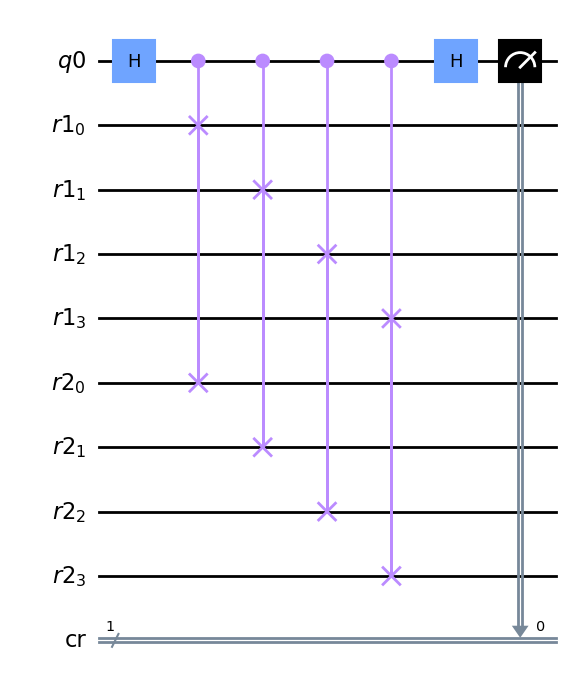

In [4]:
register_len = 4
q0 = QuantumRegister(1,'q0')
r1 = QuantumRegister(register_len,'r1')
r2 = QuantumRegister(register_len,'r2')
cr = ClassicalRegister(1,'cr')
qc = QuantumCircuit(q0,r1,r2,cr)

qc.h(0)

for i in range(register_len):
    qc.cswap(0,i+1,i+register_len+1)

qc.h(0)
qc.measure(0,0)
qc.draw()

{'1': 4179, '0': 4013}


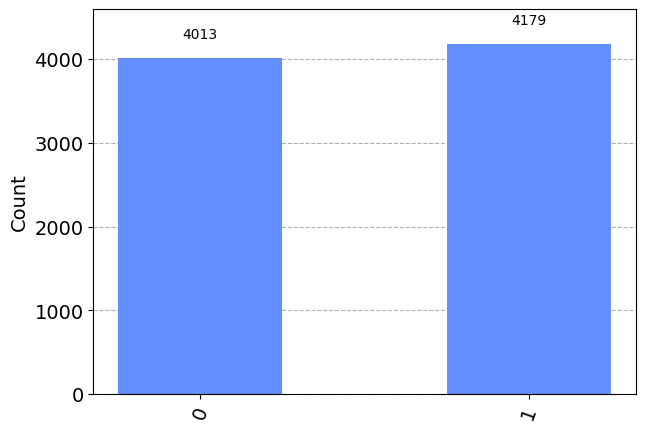

In [37]:
aer_sim = Aer.get_backend('aer_simulator')
job = execute(qc,aer_sim,shots=8192)
result_neqr = job.result()
counts_neqr = result_neqr.get_counts()
print(counts_neqr)
plot_histogram(counts_neqr)